<a href="https://colab.research.google.com/github/khadrmd/Machine-Learning/blob/main/ML_Tubes1_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desc**
Tugas clustering (unsupervised Learning) adalah mengelompokkan pelanggan berdasarkan data pelanggan di dealer tanpa memperhatikan label kelas apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak. 

Tugas classification (supervised learning) adalah memprediksi apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak berdasarkan data pelanggan di dealer.


SIM	--> 0 : Tidak punya SIM 1 : Punya SIM

Kode_Daerah --> Kode area tempat tinggal pelanggan

Sudah_Asuransi --> 1 : Pelanggan sudah memiliki asuransi kendaraan, 0 : Pelanggan belum memiliki asuransi kendaraan

Umur_Kendaraan --> Umur kendaraan

Kendaraan_Rusak --> 1 : Kendaraan pernah rusak sebelumnya. 0 : Kendaraan belum pernah rusak.

Premi --> Jumlah premi yang harus dibayarkan per tahun.

Kanal_Penjualan --> Kode kanal untuk menghubungi pelanggan (email, telpon, dll)

Lama_Berlangganan	--> Sudah berapa lama pelanggan menjadi klien perusahaan

Tertarik --> 1 : Pelanggan tertarik, 0 : Pelanggan tidak tertarik

# **Clustering**

## Import basic libraries

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import dataset

In [68]:
data = pd.read_csv('https://raw.githubusercontent.com/khadrmd/Machine-Learning/main/kendaraan_train.csv')
data.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


## Pre-processing dataset

### Check for null values

In [69]:
# Each column has around 14000 null values (except id and Tertarik)
data.isna().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [70]:
# Each column has around 275000 entries (rows)
data.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [71]:
# 14000 is around 5% of 275000
# Even if we remove 5% of the dataset in each column, we'd still have 95% of valid dataset
data.dropna(inplace=True)
data.isna().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [72]:
data.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000
mean,142794.020729,38.818137,0.997931,26.411334,0.459794,30506.747282,112.260206,154.253063,0.121577
std,82491.716355,15.531695,0.045443,13.262377,0.498382,17090.409733,54.106712,83.862579,0.326798
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71350.750000,25.000000,1.000000,15.000000,0.000000,24369.750000,29.000000,81.000000,0.000000
50%,142768.000000,36.000000,1.000000,28.000000,0.000000,31603.000000,140.000000,154.000000,0.000000
75%,214070.250000,49.000000,1.000000,35.000000,1.000000,39323.250000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Convert any binary strings to float64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171068 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 171068 non-null  int64  
 1   Jenis_Kelamin      171068 non-null  object 
 2   Umur               171068 non-null  float64
 3   SIM                171068 non-null  float64
 4   Kode_Daerah        171068 non-null  float64
 5   Sudah_Asuransi     171068 non-null  float64
 6   Umur_Kendaraan     171068 non-null  object 
 7   Kendaraan_Rusak    171068 non-null  object 
 8   Premi              171068 non-null  float64
 9   Kanal_Penjualan    171068 non-null  float64
 10  Lama_Berlangganan  171068 non-null  float64
 11  Tertarik           171068 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 17.0+ MB


In [74]:
data['Umur_Kendaraan'].unique()

array(['< 1 Tahun', '> 2 Tahun', '1-2 Tahun'], dtype=object)

In [75]:
# Jenis_Kelamin
data['Jenis_Kelamin'].replace('Wanita','1',inplace=True)
data['Jenis_Kelamin'].replace('Pria','0',inplace=True)
data['Jenis_Kelamin'] = data['Jenis_Kelamin'].astype(np.float64)

# Umur_Kendaraan
data['Umur_Kendaraan'].replace('< 1 Tahun','0',inplace=True)
data['Umur_Kendaraan'].replace('> 2 Tahun','1',inplace=True)
data['Umur_Kendaraan'].replace('1-2 Tahun','0.5',inplace=True)
data['Umur_Kendaraan'] = data['Umur_Kendaraan'].astype(np.float64)

# Kendaraan_Rusak
data['Kendaraan_Rusak'].replace('Pernah','1',inplace=True)
data['Kendaraan_Rusak'].replace('Tidak','0',inplace=True)
data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].astype(np.float64)

# Tertarik
data['Tertarik'].replace('Pernah','1',inplace=True)
data['Tertarik'].replace('Tidak','0',inplace=True)
data['Tertarik'] = data['Tertarik'].astype(np.float64)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171068 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 171068 non-null  int64  
 1   Jenis_Kelamin      171068 non-null  float64
 2   Umur               171068 non-null  float64
 3   SIM                171068 non-null  float64
 4   Kode_Daerah        171068 non-null  float64
 5   Sudah_Asuransi     171068 non-null  float64
 6   Umur_Kendaraan     171068 non-null  float64
 7   Kendaraan_Rusak    171068 non-null  float64
 8   Premi              171068 non-null  float64
 9   Kanal_Penjualan    171068 non-null  float64
 10  Lama_Berlangganan  171068 non-null  float64
 11  Tertarik           171068 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 17.0 MB


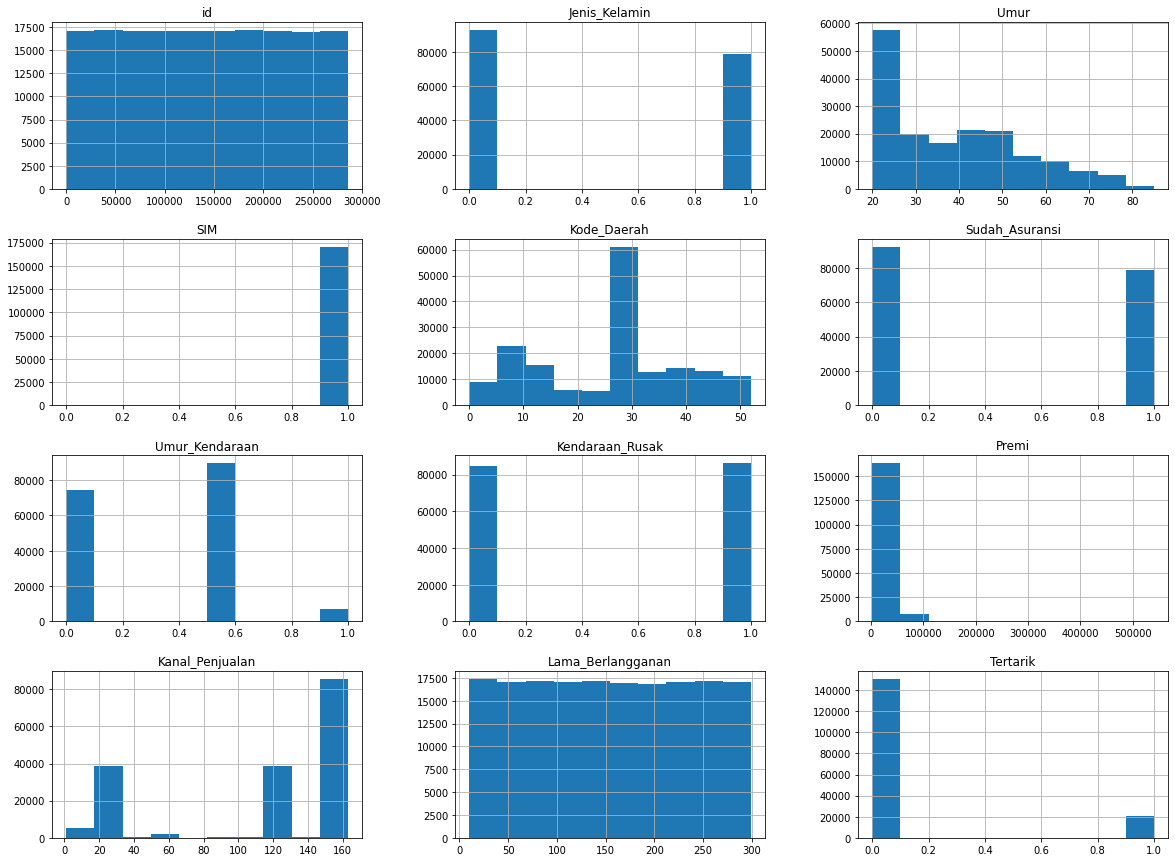

In [77]:
data.hist(figsize= (20,15));

In [78]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.0,0.0024,0.0035,-0.0041,0.00072,-0.0037,0.0031,0.0031,0.0021,-0.0017,0.0026,4.3e-06
Jenis_Kelamin,0.0024,1.0,-0.15,0.019,-0.0027,0.083,-0.16,-0.092,-0.003,0.11,0.0022,-0.054
Umur,0.0035,-0.15,1.0,-0.079,0.044,-0.26,0.77,0.27,0.064,-0.58,-0.001,0.11
SIM,-0.0041,0.019,-0.079,1.0,-0.0059,0.016,-0.037,-0.019,-0.013,0.042,0.0017,0.0087
Kode_Daerah,0.00072,-0.0027,0.044,-0.0059,1.0,-0.024,0.044,0.027,-0.012,-0.044,-0.0038,0.011
Sudah_Asuransi,-0.0037,0.083,-0.26,0.016,-0.024,1.0,-0.38,-0.83,0.004,0.22,0.0029,-0.34
Umur_Kendaraan,0.0031,-0.16,0.77,-0.037,0.044,-0.38,1.0,0.4,0.038,-0.55,-0.002,0.22
Kendaraan_Rusak,0.0031,-0.092,0.27,-0.019,0.027,-0.83,0.4,1.0,0.0087,-0.23,-0.002,0.35
Premi,0.0021,-0.003,0.064,-0.013,-0.012,0.004,0.038,0.0087,1.0,-0.11,-0.0013,0.022
Kanal_Penjualan,-0.0017,0.11,-0.58,0.042,-0.044,0.22,-0.55,-0.23,-0.11,1.0,0.00088,-0.14


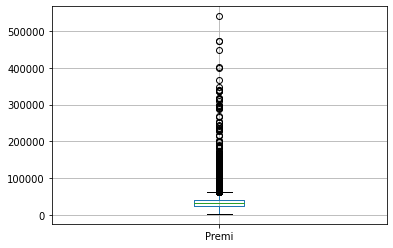

In [79]:
data.boxplot('Premi')

In [80]:
# copy the data
df_min_max_scaled = data.copy()
  
# apply normalization techniques by Column 1
column = 'id'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
column = 'Umur'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
column = 'Kode_Daerah'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
column = 'Premi'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
column = 'Kanal_Penjualan'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
column = 'Lama_Berlangganan'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 

# view normalized data
df_min_max_scaled.describe()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000
mean,0.499573,0.459338,0.289510,0.997931,0.507910,0.459794,0.303999,0.504443,0.051860,0.686791,0.499146,0.121577
std,0.288604,0.498345,0.238949,0.045443,0.255046,0.498382,0.283813,0.499982,0.031794,0.333992,0.290182,0.326798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249623,0.000000,0.076923,1.000000,0.288462,0.000000,0.000000,0.000000,0.040443,0.172840,0.245675,0.000000
50%,0.499482,0.000000,0.246154,1.000000,0.538462,0.000000,0.500000,1.000000,0.053900,0.858025,0.498270,0.000000
75%,0.748939,1.000000,0.446154,1.000000,0.673077,1.000000,0.500000,1.000000,0.068262,0.932099,0.750865,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.0,0.0024,0.0035,-0.0041,0.00072,-0.0037,0.0031,0.0031,0.0021,-0.0017,0.0026,4.3e-06
Jenis_Kelamin,0.0024,1.0,-0.15,0.019,-0.0027,0.083,-0.16,-0.092,-0.003,0.11,0.0022,-0.054
Umur,0.0035,-0.15,1.0,-0.079,0.044,-0.26,0.77,0.27,0.064,-0.58,-0.001,0.11
SIM,-0.0041,0.019,-0.079,1.0,-0.0059,0.016,-0.037,-0.019,-0.013,0.042,0.0017,0.0087
Kode_Daerah,0.00072,-0.0027,0.044,-0.0059,1.0,-0.024,0.044,0.027,-0.012,-0.044,-0.0038,0.011
Sudah_Asuransi,-0.0037,0.083,-0.26,0.016,-0.024,1.0,-0.38,-0.83,0.004,0.22,0.0029,-0.34
Umur_Kendaraan,0.0031,-0.16,0.77,-0.037,0.044,-0.38,1.0,0.4,0.038,-0.55,-0.002,0.22
Kendaraan_Rusak,0.0031,-0.092,0.27,-0.019,0.027,-0.83,0.4,1.0,0.0087,-0.23,-0.002,0.35
Premi,0.0021,-0.003,0.064,-0.013,-0.012,0.004,0.038,0.0087,1.0,-0.11,-0.0013,0.022
Kanal_Penjualan,-0.0017,0.11,-0.58,0.042,-0.044,0.22,-0.55,-0.23,-0.11,1.0,0.00088,-0.14


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


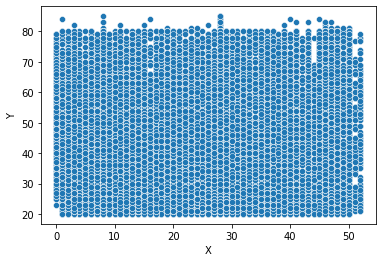

In [82]:
data = data.loc[:, ['Kode_Daerah', 'Umur']]
X = data.values
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [83]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [84]:
def kmeans(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = data.sample(n=k).values
  while diff:
     # for each observation
     for i, row in enumerate(X):
        mn_dist = float('inf')
        # dist of the point from all centroids
        for idx, centroid in enumerate(centroids):
            d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
            # store closest centroid
            if mn_dist > d:
               mn_dist = d
               cluster[i] = idx
     new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     # if centroids are same then leave
     if np.count_nonzero(centroids-new_centroids) == 0:
        diff = 0
     else:
        centroids = new_centroids
  return centroids, cluster

In [63]:
cost_list = []
for k in range(1, 6):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

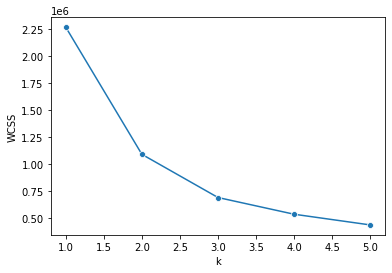

In [85]:
sns.lineplot(x=range(1,6), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [86]:
k = 3
centroids, cluster = kmeans(X, k)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


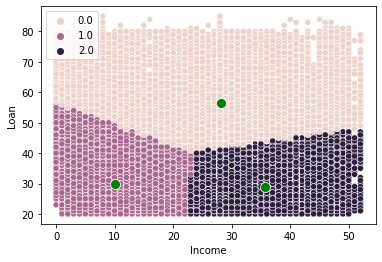

In [87]:
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='green')
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()